In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
%matplotlib notebook
import sklearn
import skimage
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split

import os
from skimage.transform import resize
import pylab

import pydicom as pyd

from scipy import ndimage, misc

import cv2

In [2]:
def dcmchange(orig,clahe) :
    r,c = orig.shape
    new = np.empty((r,c,3), dtype=orig.dtype)
#     new[:,:,:] = orig[:,:,np.newaxis]
    new[:,:,0] = orig[:,:]
    new[:,:,1] = clahe[:,:]
    new[:,:,2] = clahe[:,:]
    return new

In [3]:
# Feature
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure

In [4]:
p = Path("dataset/Intras/")
dirs = p.glob("*")
labels_dict = {'fold1':0, 'fold2':1, 'fold3':2,
               'fold4': 3, 'fold5': 4, 'test': 5, 'No Finding' : 6}
count = 0

fold1_images = []
fold2_images = []
fold3_images = []
fold4_images = []
fold5_images = []
test_images = []
normal_images = []
# fold1_labels = []
# fold2_labels = []
# fold3_labels = []
# fold4_labels = []
# fold5_labels = []
# test_labels = []
# normal_labels = []

count_normal = 0
count_fold1 = 0
count_fold2 = 0
count_fold3 = 0
count_fold4 = 0
count_fold5 = 0
count_test = 0

for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1][:-1]
#     print(label)
#     print(folder_dir)
    if label == 'fold1' or label == 'fold2' or label == 'fold3' or label == 'fold4' or label == 'fold5' or label == 'test' :
        for img_path in folder_dir.glob("*.dcm"):
        #             print(img_path)
        #             pic = pyd.read_file(os.path.normpath(img_path))
            target = "./" + str(img_path)

            pic = pyd.read_file(target)
            pic_r = np.array(pic.pixel_array)
            %matplotlib inline 
            #         preprocessing
            clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
            pic_r1 = clahe.apply(pic_r)
            #         preprocessing
            IMG_PX_SIZE = 224
            resized_img1 = resize(pic_r, (IMG_PX_SIZE, IMG_PX_SIZE), anti_aliasing=True)
            resized_clahe = resize(pic_r1, (IMG_PX_SIZE, IMG_PX_SIZE), anti_aliasing=True)
        #             resized_equal = exposure.equalize_adapthist(resized_img1, clip_limit=0.03)
                    #change pic to (224,224,3)
            resized_img2 = dcmchange(resized_img1,resized_clahe)
            resized_img = exposure.equalize_adapthist(resized_img2, clip_limit=0.03)
            #         resized_img = resized_img.flatten()

            if label == 'fold1' :
                fold1_images.append(resized_img)
#                 fold1_labels.append(labels_dict[label])
            #             heart_images.append(ndimage.rotate(resized_img2, 1, reshape=False))
                count_fold1+=1
            elif label == 'fold2' :
                fold2_images.append(resized_img)
#                 fold2_labels.append(labels_dict[label])
            #             heart_images.append(ndimage.rotate(resized_img2, 1, reshape=False))
                count_fold2+=1
            elif label == 'fold3' :
                fold3_images.append(resized_img)
#                 fold3_labels.append(labels_dict[label])
            #             heart_images.append(ndimage.rotate(resized_img2, 1, reshape=False))
                count_fold3+=1
            elif label == 'fold4' :
                fold4_images.append(resized_img)
#                 fold4_labels.append(labels_dict[label])
            #             heart_images.append(ndimage.rotate(resized_img2, 1, reshape=False))
                count_fold4+=1
            elif label == 'fold5' :
                fold5_images.append(resized_img)
#                 fold5_labels.append(labels_dict[label])
            #             heart_images.append(ndimage.rotate(resized_img2, 1, reshape=False))
                count_fold5+=1
            elif label == 'test' :
                test_images.append(resized_img)
#                 test_labels.append(labels_dict[label])
            #             heart_images.append(ndimage.rotate(resized_img2, 1, reshape=False))
                count_test+=1

            if count_fold1 == 150 or count_fold2 == 150 or count_fold3 == 150 or count_fold4 == 150 or count_fold5 == 150 or count_test == 150 : 
                break
        count_fold1 = 0
        count_fold2 = 0
        count_fold3 = 0
        count_fold4 = 0
        count_fold5= 0
        count_test = 0
                

In [5]:
p = Path("dataset/")
dirs = p.glob("*")
labels_dict = {'Abnormal':0, 'Extra':1, 'Heart and TGV':0,
               'Intra': 3, 'No Finding': 1, 'TB': 5, 'Pneumonia' : 6}
count = 0

normal_images = []
# normal_labels = []

count_normal = 0


for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1][:-1]
#     print(label)
#     print(folder_dir)
    if label == 'No Finding' :
        for img_path in folder_dir.glob("*.dcm"):
#             print(img_path)
#             pic = pyd.read_file(os.path.normpath(img_path))
            target = "./" + str(img_path)

            pic = pyd.read_file(target)
            pic_r = np.array(pic.pixel_array)
            %matplotlib inline 
    #         preprocessing
            clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
            pic_r1 = clahe.apply(pic_r)
    #         preprocessing
            IMG_PX_SIZE = 224
            resized_img1 = resize(pic_r, (IMG_PX_SIZE, IMG_PX_SIZE), anti_aliasing=True)
            resized_clahe = resize(pic_r1, (IMG_PX_SIZE, IMG_PX_SIZE), anti_aliasing=True)
            resized_equal = exposure.equalize_adapthist(resized_img1, clip_limit=0.03)
            #change pic to (224,224,3)
            resized_img2 = dcmchange(resized_img1,resized_clahe)
            resized_img = exposure.equalize_adapthist(resized_img2, clip_limit=0.03)
    #         resized_img = resized_img.flatten()
            if label == 'No Finding' :
                normal_images.append(resized_img)
#                 normal_labels.append(labels_dict[label])
                count_normal+=1

            if count_normal == 900: 
                break

        count_normal = 0


In [6]:
# normal_labels = np.array(normal_labels)
normal_images = np.array(normal_images, dtype=np.float32)
# fold1_labels = np.array(fold1_labels)
fold1_images = np.array(fold1_images, dtype=np.float32)
# fold2_labels = np.array(fold2_labels)
fold2_images = np.array(fold2_images, dtype=np.float32)
# fold3_labels = np.array(fold3_labels)
fold3_images = np.array(fold3_images, dtype=np.float32)
# fold4_labels = np.array(fold4_labels)
fold4_images = np.array(fold4_images, dtype=np.float32)
# fold5_labels = np.array(fold5_labels)
fold5_images = np.array(fold5_images, dtype=np.float32)
# test_labels = np.array(test_labels)
test_images = np.array(test_images, dtype=np.float32)

In [7]:
# print("number of sample No Finding: {}".format(len(normal_images)))
print("number of sample fold1: {}".format(len(fold1_images)))
print("number of sample fold2: {}".format(len(fold2_images)))
print("number of sample fold3: {}".format(len(fold3_images)))
print("number of sample fold4: {}".format(len(fold4_images)))
print("number of sample fold5: {}".format(len(fold5_images)))
print("number of sample test: {}".format(len(test_images)))
print("number of sample test: {}".format(len(normal_images)))

number of sample fold1: 150
number of sample fold2: 150
number of sample fold3: 150
number of sample fold4: 150
number of sample fold5: 150
number of sample test: 150
number of sample test: 900


In [8]:
normal_images.shape[0]

900

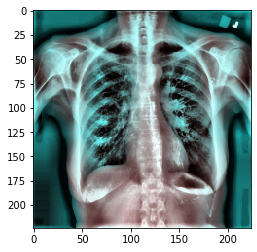

In [9]:
plt.imshow(normal_images[3])

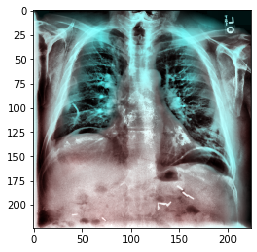

In [10]:
plt.imshow(test_images[3])

## Feature

In [11]:
from sklearn.preprocessing import StandardScaler
def scaling(X_train,X_test,X_val) :
    #Feature Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)
    X_val = sc.fit_transform(X_val)
    return X_train,X_test,X_val

In [12]:
from sklearn.metrics import accuracy_score
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc

## Model

In [13]:
from sklearn.ensemble import RandomForestClassifier
def random_model(X_train_recv,y_train_recv,X_test_recv,y_test_recv,X_val_recv,y_val_recv,r) :
    random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
#     svm = SVC(kernel='rbf', probability=True, C=50, gamma=100)
    #train Model 
    random.fit(X_train_recv,y_train_recv)
    score = random.score(X_test_recv, y_test_recv)
    print("Score : {}".format(score))
    
    y_score = random.predict_proba(X_val_recv)[:, 1]
#     y_check = model_svm.predict(X_val)
#     print(y_check)
    y_pred = random.predict(X_val_recv)
#     print(y_pred)
    accuracy = accuracy_score(y_val_recv,y_pred)
#     for x in zip(y_score2,y_pred) :
#         print(x)
    
    print("Random Forest accuracy from Fold {} : {}".format(r,accuracy))
    #Confusion Matrix
    %matplotlib inline 
    confusion(y_val_recv,y_pred)
    
    #roc
    fpr, tpr, thresholds = roc_curve(y_val_recv, y_score)
    roc_auc = metrics.auc(fpr, tpr)
    
    return fpr,tpr,roc_auc

## Confusion 

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
def confusion(y_test,pred) :
    #Confusion Matrix
    %matplotlib inline 

    confusion_mat1 = confusion_matrix(y_test, pred)
    confusion_mat1 = confusion_mat1.astype('float') / confusion_mat1.sum(axis=1)[:, np.newaxis]
    
    sns.heatmap(confusion_mat1, annot=True, fmt=".2f")

    plt.show()

## ROC

In [15]:
def roc(fpr_recv,tpr_recv,acc_recv) :
#     stck_auc = []
    color = ["orange","green","blue","red","purple"]
    for i in range(5):
        fpr_use = fpr_recv[i]
        tpr_use = tpr_recv[i]
        acc_use = acc_recv[i]
#         auc = roc_auc_score(y_val_rec, roc_pred)
#         print('AUC Fold %d: %0.4f' %(i,auc))
        
        plt.plot(fpr_use, tpr_use, color='{}'.format(color[i]), label='AUC Fold %d: %0.4f' %(i,acc_use))
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
    plt.show()

## RUN

In [16]:
from sklearn.svm import SVC
import nltk
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
import random
def AllinOne2(other, normal) :
    data = []
    label = []
    box_tpr = []
    box_fpr = []
    box_acc = []
    index = 0
#     for i in range(5):
#         for count in range(int(normal.shape[0]/5)):
#             data.append(normal[index+count].flatten())
#             label.append(1)
# #             print(index+count)
#         for count in range(int(other.shape[0]/5)):
#             data.append(other[index+count].flatten())
#             label.append(0)
#         index+=int(normal.shape[0]/5)  
#     data = np.array(data)
#     label = np.array(label)
#     train_data, X_test, label_train, y_test = train_test_split(data, label, test_size=0.2)
#     k=0       
#     kf = KFold(5, shuffle=True)
#     for train, val in kf.split(train_data):
# #         random.shuffle(train)
# #         random.shuffle(test)
#         X_train = train_data[train]
#         X_val = train_data[val]
#         y_train = label_train[train]
#         y_val = label_train[val]
#         print(y_val)
    for i in range(5):
        if(i==1):
            X_train = data.append(fold2)
            X_val = data.append(ford1)
        
        # Feature      
    X_train_n,X_test_n,X_val_n = scaling(X_train,X_test,X_val)
     # run model
    recv_fpr,recv_tpr,recv_acc = random_model(X_train_n,y_train,X_test_n,y_test,X_val_n,y_val,k)
    box_fpr.append(recv_fpr)
    box_tpr.append(recv_tpr)
    box_acc.append(recv_acc)
    k+=1
        #f1-score
#         cm_plot_labels = ['Finding', 'Normal']
#         print(classification_report(y_val, probs, target_names=cm_plot_labels))
    # ROC
    roc(box_fpr,box_tpr,box_acc)

In [17]:
from sklearn.svm import SVC
import nltk
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
import random
def newdata(fold_1,fold_2,fold_3,fold_4,fold_5,test_dis,normal):
    box_fpr = []
    box_tpr = []
    box_acc = []
    size = test_dis.shape[0]
    X_test = []
    y_test = []
    for i in range(size):
        X_test.append(test_dis[i].flatten())
        y_test.append(0)
    for j in range(size):
        X_test.append(normal[j].flatten())
        y_test.append(1)
    k = 0
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    data = []
    label =[]
    train_normal = []
    index = size
    for k in range(5*size):
        if k < size :
            data.append(normal[index+k].flatten())
            label.append(1)
            data.append(fold_1[k].flatten())
            label.append(0)
        elif k < 2 * size :
            data.append(normal[index+k].flatten())
            label.append(1)
            data.append(fold_2[k-size].flatten())
            label.append(0)
        elif k < 3 * size :
            data.append(normal[index+k].flatten())
            label.append(1)
            data.append(fold_3[k-(2 * size)].flatten())
            label.append(0)
        elif k < 4 * size :
            data.append(normal[index+k].flatten())
            label.append(1)
            data.append(fold_4[k-(3 * size)].flatten())
            label.append(0)
        elif k < 5 * size :
            data.append(normal[index+k].flatten())
            label.append(1)
            data.append(fold_5[k-(4 * size)].flatten())
            label.append(0)
    
    label = np.array(label)
#     print(label.shape)
    data = np.array(data, dtype=np.float32)
#     print(data.shape)
    #KFOLD
    cycle = 0
    kf = KFold(5, shuffle=True)
    for train, val in kf.split(data):
        X_train = data[train]
        X_val = data[val]
        y_train = label[train]
        y_val = label[val]
            
     # Feature      
        X_train_n,X_test_n,X_val_n = scaling(X_train,X_test,X_val)
     # run model
        recv_fpr,recv_tpr,recv_acc = random_model(X_train_n,y_train,X_test_n,y_test,X_val_n,y_val,cycle)
        box_fpr.append(recv_fpr)
        box_tpr.append(recv_tpr)
        box_acc.append(recv_acc)
        cycle+=1
        #f1-score
#         cm_plot_labels = ['Finding', 'Normal']
#         print(classification_report(y_val, probs, target_names=cm_plot_labels))
    # ROC
    roc(box_fpr,box_tpr,box_acc)

Score : 0.75
Random Forest accuracy from Fold 0 : 0.5666666666666667


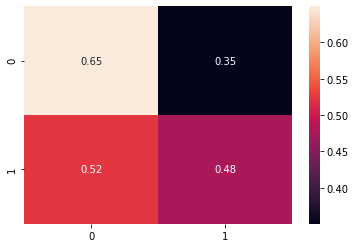

Score : 0.7433333333333333
Random Forest accuracy from Fold 1 : 0.6266666666666667


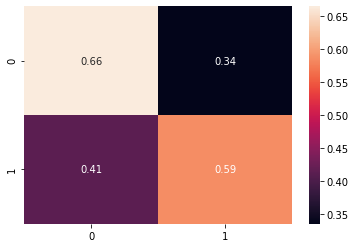

Score : 0.7566666666666667
Random Forest accuracy from Fold 2 : 0.59


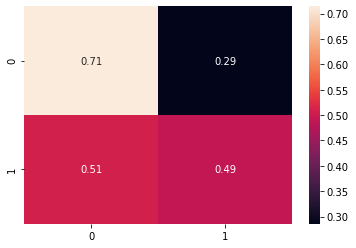

Score : 0.76
Random Forest accuracy from Fold 3 : 0.63


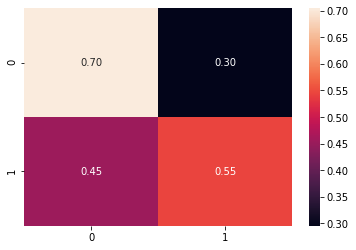

Score : 0.73
Random Forest accuracy from Fold 4 : 0.6466666666666666


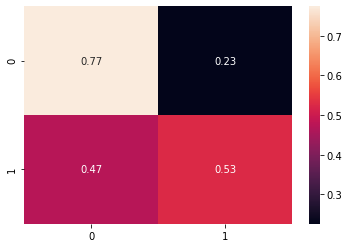

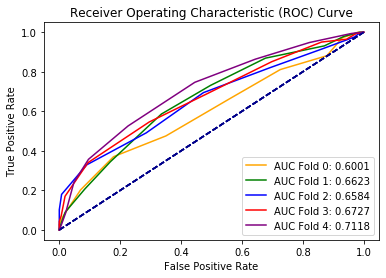

In [18]:
newdata(fold1_images,fold2_images,fold3_images,fold4_images,fold5_images,test_images,normal_images)